In [19]:
from __future__ import division
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import scipy.stats as stats

%matplotlib inline
# import mpld3

In [2]:
df = pd.DataFrame.from_csv('Crimes_-_2001_to_present.csv', infer_datetime_format=True)

In [3]:
df['Date Only'] = pd.to_datetime(df['Date'], format="%m/%d/%Y", exact=False)

In [4]:
df['Year'] = df['Date Only'].dt.year

In [5]:
df['Month'] = df['Date Only'].dt.month
df['Day'] = df['Date Only'].dt.day

In [6]:
df.head()

,Date,Primary Type,Date Only,Year,Month,Day
ID,,,,,,
10028048,04/10/2015 11:45:00 PM,BATTERY,2015-04-10,2015,4,10
10028038,04/10/2015 11:40:00 PM,BATTERY,2015-04-10,2015,4,10
10028104,04/10/2015 11:38:00 PM,ASSAULT,2015-04-10,2015,4,10
10028046,04/10/2015 11:35:00 PM,ASSAULT,2015-04-10,2015,4,10
10028704,04/10/2015 11:30:00 PM,ASSAULT,2015-04-10,2015,4,10


In [7]:
# # pickle the dataframe after most of the processing finished
# with open('violent_crime_dataframe.pkl', "wb") as f:
#     pickle.dump(df, f)

In [8]:
df[(df['Month'] == 1) & (df['Day'] == 1)].head()

,Date,Primary Type,Date Only,Year,Month,Day
ID,,,,,,
9911983,01/01/2015 11:50:00 PM,ROBBERY,2015-01-01,2015,1,1
9911952,01/01/2015 11:50:00 PM,BATTERY,2015-01-01,2015,1,1
9911966,01/01/2015 11:34:00 PM,BATTERY,2015-01-01,2015,1,1
9911977,01/01/2015 11:30:00 PM,BATTERY,2015-01-01,2015,1,1
9913343,01/01/2015 11:15:00 PM,BATTERY,2015-01-01,2015,1,1


In [9]:
sexassault_cnt = df[(df['Primary Type'] == 'CRIM SEXUAL ASSAULT')][['Date Only', 'Primary Type', 'Year', 'Month', 'Day']]

In [10]:
sexassault_cnt.head()

,Date Only,Primary Type,Year,Month,Day
ID,,,,,
10027979,2015-04-10,CRIM SEXUAL ASSAULT,2015,4,10
10032222,2015-04-09,CRIM SEXUAL ASSAULT,2015,4,9
10026230,2015-04-08,CRIM SEXUAL ASSAULT,2015,4,8
10025419,2015-04-08,CRIM SEXUAL ASSAULT,2015,4,8
10026579,2015-04-07,CRIM SEXUAL ASSAULT,2015,4,7


In [12]:
sexassault_cnt['Year'].nunique()

15

In [13]:
sexassault_cnt['Year'].value_counts()

2002    1820
2001    1792
2003    1584
2004    1551
2005    1524
2007    1508
2008    1501
2006    1443
2011    1442
2009    1385
2012    1380
2010    1328
2014    1234
2013    1222
2015     266
dtype: int64

In [11]:
sexassault_cnt_by_day = sexassault_cnt['Date Only'].value_counts()

In [15]:
sexassault_cnt.groupby('Date Only').count().head()

,Primary Type,Year,Month,Day
Date Only,,,,
2001-01-01,38,38,38,38
2001-01-02,2,2,2,2
2001-01-03,7,7,7,7
2001-01-04,2,2,2,2
2001-01-05,6,6,6,6


In [16]:
sexassault_cnt_by_day.head()

2010-01-01    41
2005-01-01    40
2004-01-01    40
2001-01-01    38
2008-01-01    38
dtype: int64

In [39]:
sns.set() #reset parameters so they dont layer on top of each other every time you change
sns.set_palette("pastel")
sns.set_style("darkgrid")
sns.set(font_scale=1.5)


mpl.rc("figure", figsize=(14, 7))
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
# mpl.rc('font', **font)

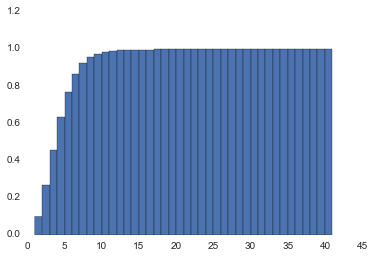

In [18]:
#Cumulative distribution function (CDF)
sexassault_cnt_by_day.hist(cumulative=True, normed=1, bins=40)

In [24]:
#Percentile rank of ten sexuals assaults per day
stats.percentileofscore(sexassault_cnt_by_day, 10)

97.646474677259192

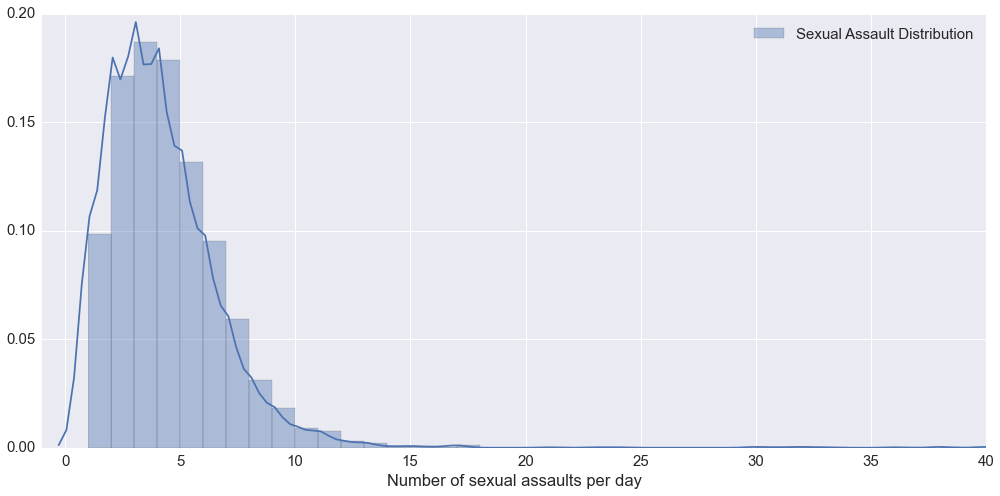

In [20]:
all_label = "Sexual Assault Distribution"
g = sns.distplot(sexassault_cnt_by_day, label=all_label, bins=40, axlabel='Number of sexual assaults per day');
g.set_xlim(-1,40)
plt.legend()
plt.tight_layout()
plt.savefig("sexual_assault_distribution")

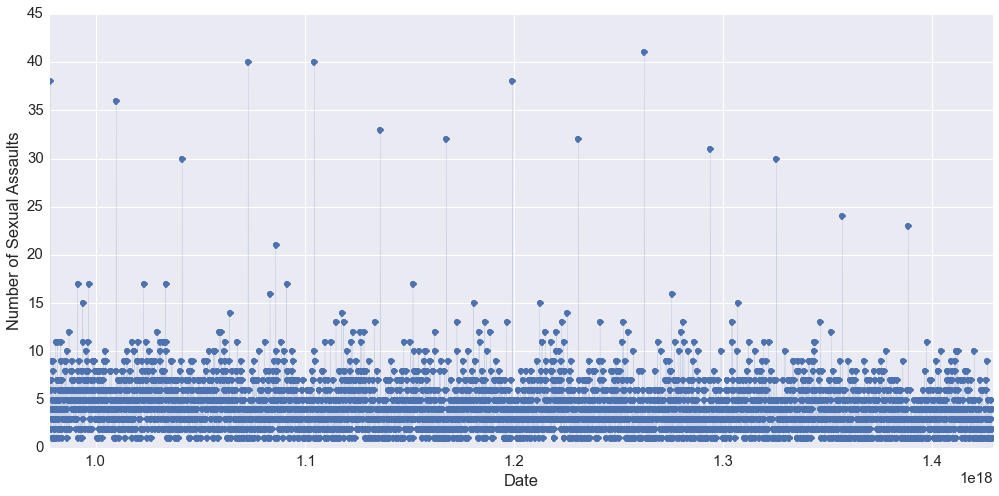

In [21]:
g = sns.tsplot(sexassault_cnt_by_day, sexassault_cnt_by_day.index, interpolate=False)
g.set_xlabel('Date')
g.set_ylabel('Number of Sexual Assaults')
plt.tight_layout()

In [22]:
sexassault_cnt_by_day.index.dayofweek

array([4, 5, 3, ..., 3, 2, 4], dtype=int32)

In [23]:
sexassault_cnt_by_day.head()

2010-01-01    41
2005-01-01    40
2004-01-01    40
2001-01-01    38
2008-01-01    38
dtype: int64

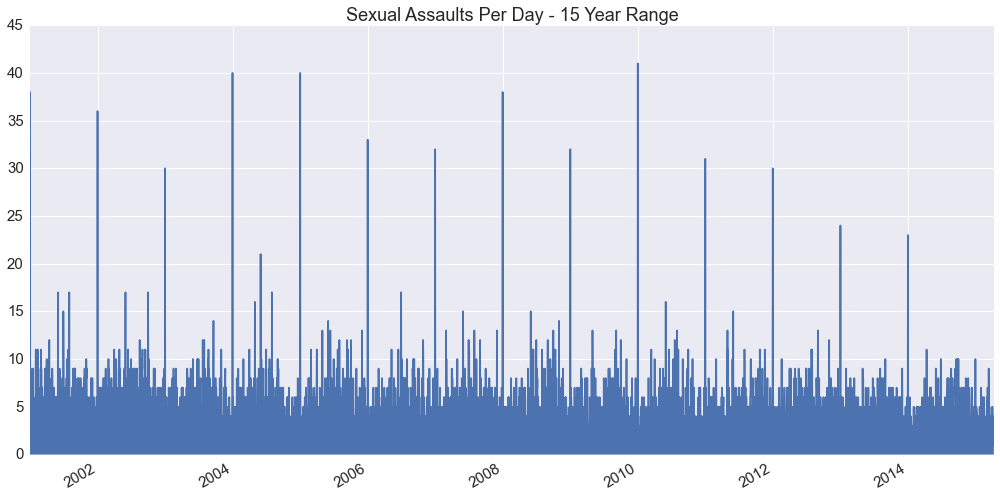

In [24]:
sexassault_cnt_by_day.plot(kind='area')
plt.title('Sexual Assaults Per Day - 15 Year Range')
plt.tight_layout()
plt.savefig("per_day_15_years")

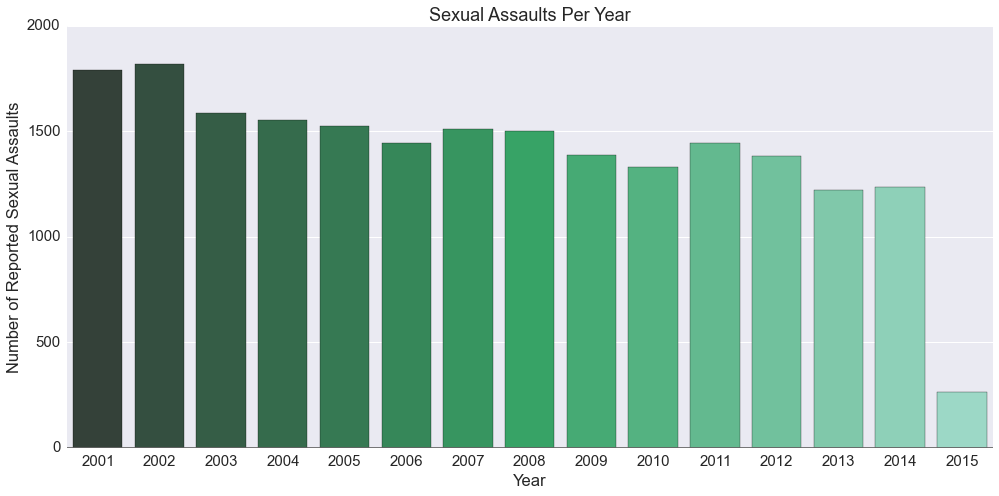

In [25]:
data = sexassault_cnt['Year'].value_counts()
g = sns.barplot(data.index, data.values, palette="BuGn_d", hline=.1)
g.set_xlabel('Year')
g.set_ylabel('Number of Reported Sexual Assaults')
plt.title('Sexual Assaults Per Year')
plt.tight_layout()
plt.savefig("per_year")

In [26]:
sexassault_cnt[(sexassault_cnt['Date Only'].dt.year == 2010)].head()

,Date Only,Primary Type,Year,Month,Day
ID,,,,,
7869695,2010-12-31,CRIM SEXUAL ASSAULT,2010,12,31
7869306,2010-12-31,CRIM SEXUAL ASSAULT,2010,12,31
7870730,2010-12-31,CRIM SEXUAL ASSAULT,2010,12,31
7869095,2010-12-31,CRIM SEXUAL ASSAULT,2010,12,31
7869381,2010-12-31,CRIM SEXUAL ASSAULT,2010,12,31


In [27]:
new_year_2010 = pd.Series()
new_year_2010['New Years'] = int(sexassault_cnt_by_day['2010-01-01'])
all_other_days = sexassault_cnt_by_day['2010-01'].drop(pd.Timestamp('2010-01-01 00:00:00')).sum()
new_year_2010['All other days'] = all_other_days

In [28]:
new_year_2010

New Years         41
All other days    79
dtype: int64

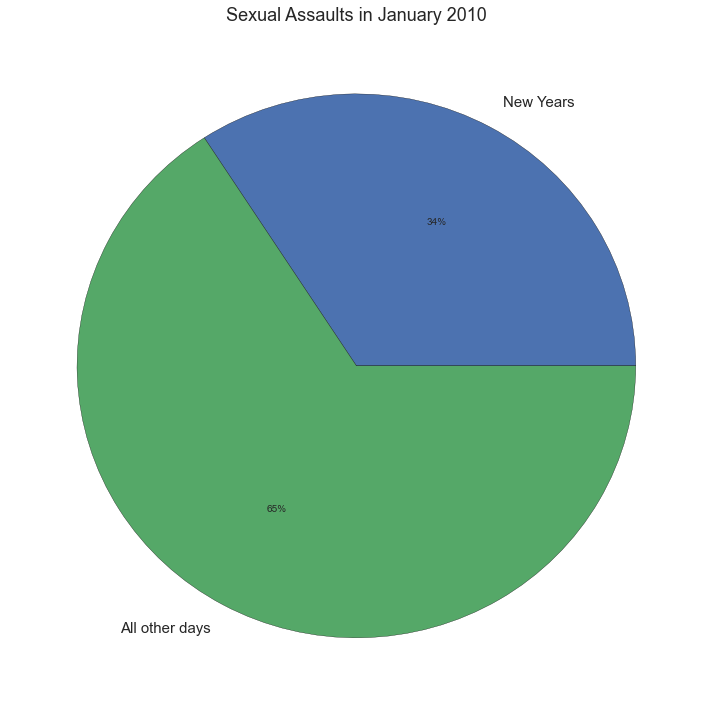

In [29]:
new_year_2010.plot(kind='pie', figsize=(10,10), autopct='%i%%')
plt.title("Sexual Assaults in January 2010")
plt.tight_layout()
plt.savefig("pie")

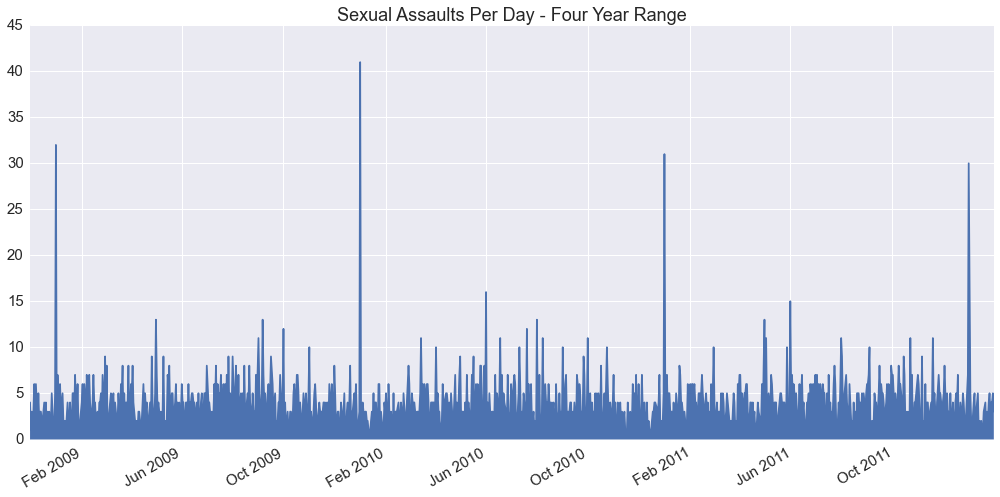

In [30]:
sns.set_palette("deep")
sexassault_cnt_by_day['2008-12':'2012-1'].plot(kind='area')
plt.title('Sexual Assaults Per Day - Four Year Range')
plt.tight_layout()
plt.savefig("per_day_four_years")

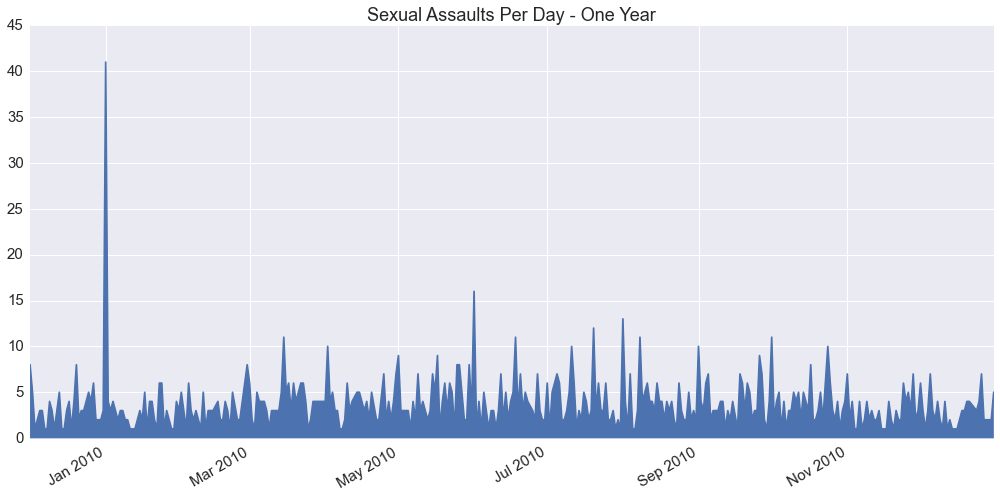

In [31]:
sexassault_cnt_by_day['2009-12':'2010-12'].plot(kind='area')
plt.title('Sexual Assaults Per Day - One Year')
plt.tight_layout()
plt.savefig("per_day_one_year")

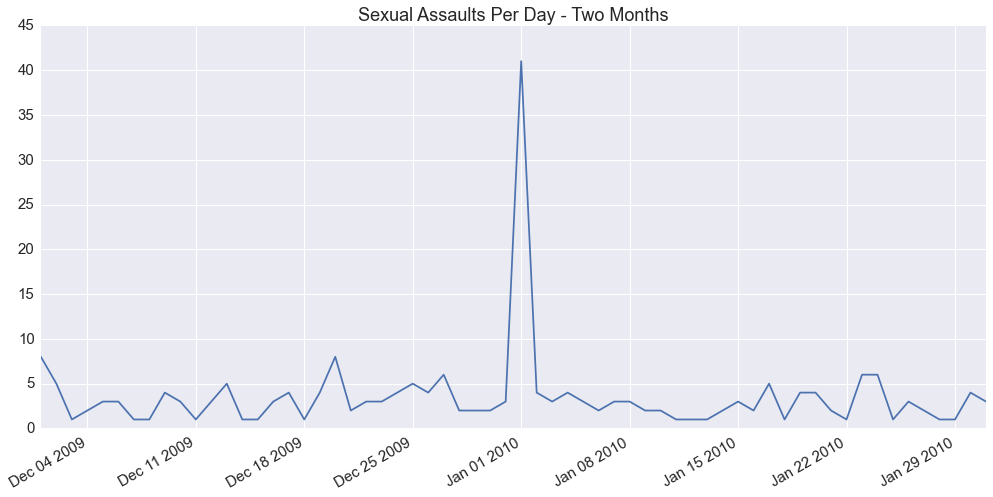

In [32]:
sexassault_cnt_by_day['2009-12':'2010-1'].plot()
plt.title('Sexual Assaults Per Day - Two Months')
plt.tight_layout()
plt.savefig("per_day_two_months")

In [33]:
sexassault_cnt_by_day['2009-12':'2010-12'].sort(sexassault_cnt_by_day.values)

In [34]:
sexassault_cnt_by_day['2009-12':'2010-12'].head()

2010-01-01    41
2010-06-01    16
2010-08-01    13
2010-07-20    12
2010-03-15    11
dtype: int64

In [35]:
avg_day = sexassault_cnt_by_day['2009-12':'2010-12'].mean()
max_day = sexassault_cnt_by_day['2009-12':'2010-12'].max()
sexassault_cnt_by_day['2009-12':'2010-12'].describe()

count    381.000000
mean       3.742782
std        2.965056
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       41.000000
dtype: float64

In [36]:
print("The next largest value is 2.5x smaller than new years.")

The next largest value is 2.5x smaller than new years.


In [37]:
print("In 2010, you were {0}% more likely to be a victim of sexual assault on New Years in Chicago versus the average day.".format(int(max_day/avg_day * 100)))

In 2010, you were 1095% more likely to be a victim of sexual assault on New Years in Chicago versus the average day.


In [38]:
print("Almost 1100% more likely!!!")

Almost 1100% more likely!!!


#Almost 1100% more likely!!!


#68% of sexual assaults go unreported
Justice Department, National Crime Victimization Survey: 2008-2012